# Assignment 5
### Do all four questions.

**1.** Let's review some basic matrix multiplication. When you have an $M \times N$ matrix $A$ with $M$ rows and $N$ columns, 
$$
A= \left[ \begin{array}{cccc} a_{11} & a_{12} & ... & a_{1N} \\
a_{21} & a_{22} & ... & a_{2N} \\
\vdots & \vdots & ... & \vdots \\
a_{M1} & a_{M2} & ... & a_{MN} 
\end{array} \right],
$$
and you right-multiply it by a vector
$$
x = \left[ \begin{array}{c} x_1 \\ x_2 \\ \vdots \\ x_N 
\end{array} \right],
$$
you get
$$
Ax = \left[ \begin{array}{c} \sum_{i=1}^N a_{1i} x_i \\ \sum_{i=1}^N a_{2i} x_i \\ \vdots \\ \sum_{i=1}^N a_{Mi} x_i 
\end{array} \right].
$$
This is just "matrix row times column vector" element-by-element, stacking the results into a new vector.

For this to make sense, $N$ must be the same for the matrix and the vector, but $M$ can be different from $N$. 

Let's play with some NumPy to see this. First we'll define a matrix $A$:

In [1]:
import numpy as np

A = np.array([ [1,2,3],
              [4,5,6],
              [7,8,9]])
A

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

a. Multiply $A$ times each of the following vectors using the @ operator. Explain which part of the $A$ matrix gets selected and explain why, using the definition of matrix multiplication. 

In [2]:
e_1 = np.array([1,0,0])
e_2 = np.array([0,1,0])
e_3 = np.array([0,0,1])

b. Now multiply $A$ times $u = (1,1,1)$. Explain the logic of the result with the definition of matrix multiplication.

In [3]:
u = np.ones(3)

c. Whenever a matrix has 1's on the diagonal and zeros everywhere else, we call it an **identity matrix**. What happens when you multiple $A$ times $x$ below? What happens when you multiple an identity matrix times any vector? Explain your result with the definition of matrix multiplication.

In [4]:
A = np.array([ [1,0,0],
              [0,1,0],
              [0,0,1]])
x = np.array([-2,4,11])


d. What if every row and column sum to 1, but the 1's are no longer on the diagonal? Multiple $A$ times $X$ below and explain the result. Create another matrix whose rows and columns sum to 1, but is not an identity matrix, and show how it permutes the values of $x$. 

In [5]:
A = np.array([ [0,0,1],
              [1,0,0],
              [0,1,0]])
x = np.array([-2,4,11])


e. The next matrix $A$ could be a Markov transition matrix: Its columns sum to 1, and each entry $a_{ij}$ can be interpreted as the proportion of observations who moved from state $j$ to state $i$. Multiply $A$ by each of the vectors $e_1$, $e_2$, and $e_3$, and explain your results.

In [6]:
rng = np.random.default_rng(100)
A = rng.random((3,3)) # Generate a random 3X3 matrix
sums = np.sum(A,axis=0) # Column sums
A = A/sums # Normalize the columns so they sum to 1
print(A)

[[0.50052958 0.24049286 0.18358131]
 [0.02574731 0.39251588 0.37907577]
 [0.47372311 0.36699127 0.43734292]]


f. For each of the vectors $e_1, e_2, e_3$, multiple $A$ times that vector 5 times. What answer do you get for each starting vector? Describe the behavior you observe.

*2.* Let's consider a simple Markov transition matrix over two states:
$$
T = \left[ \begin{array}{cc} p_{1\leftarrow 1} &  p_{1\leftarrow 2} \\
p_{2 \leftarrow 1} & p_{2 \leftarrow 2} \end{array}\right] 
$$
The arrows help visualize the transition a bit: This is the same index notation as usual, $p_{ij}$, but writing it $p_{i \leftarrow j}$ emphasizes that it's the proportion of times that state $j$ transitions to state $i$. Below, $T$ is given by
$$
T = \left[ \begin{array}{cc} .25 & .5 \\
.75 & .5 \end{array}\right].
$$

- Start in state 1, at the initial condition $[1,0]$. Multiply that vector by $T$. Write out the result in terms of the formula and compute the result in a code chunk below. What is this object you're looking at, in terms of proportions and transitions?
- Multiple by $T$ again. What do you get? This isn't a column of $T$. Explain in words what it is. (Hint: A forecast of what in what period?)
- Keep multiplying the current vector of outcomes by $T$. When does it start to settle down without changing further?
- Do the above analysis again, starting from the initial condition $[0,1]$. Do you get a different result?
- The take-away is that, in the long run, these chains settle down into the long-run proportions, and the sensitivity on initial conditions vanishes. 


In [7]:
T = np.array([[ 1/4, 1/2],
                 [ 3/4, 1/2 ]])

In [8]:
import numpy as np

init_condition = np.array([1,0]) # Start in state 1
p_1 = T @ init_condition
p_2 = T @ p_1

print(init_condition)
print(p_1)
print(p_2)

[1 0]
[0.25 0.75]
[0.4375 0.5625]


In [9]:
n = 1000
p = np.array([1,0]) # Start in state 1
for i in range(n):
    print(p)
    p = T @ p

[1 0]
[0.25 0.75]
[0.4375 0.5625]
[0.390625 0.609375]
[0.40234375 0.59765625]
[0.39941406 0.60058594]
[0.40014648 0.59985352]
[0.39996338 0.60003662]
[0.40000916 0.59999084]
[0.39999771 0.60000229]
[0.40000057 0.59999943]
[0.39999986 0.60000014]
[0.40000004 0.59999996]
[0.39999999 0.60000001]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0

In [10]:
n = 1000
state = 0
sim = []
for i in range(n):
    sim.append(state)
    prob = T[:,state]
    state = np.random.choice([0,1],p=prob)

In [11]:
sim

[0,
 np.int64(0),
 np.int64(1),
 np.int64(1),
 np.int64(0),
 np.int64(1),
 np.int64(0),
 np.int64(0),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(0),
 np.int64(1),
 np.int64(0),
 np.int64(1),
 np.int64(0),
 np.int64(0),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(0),
 np.int64(1),
 np.int64(0),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(0),
 np.int64(0),
 np.int64(1),
 np.int64(0),
 np.int64(1),
 np.int64(0),
 np.int64(1),
 np.int64(0),
 np.int64(1),
 np.int64(0),
 np.int64(1),
 np.int64(0),
 np.int64(1),
 np.int64(0),
 np.int64(1),
 np.int64(0),
 np.int64(1),
 np.int64(1),
 np.int64(0),
 np.int64(1),
 np.int64(0),
 np.int64(1),
 np.int64(0),
 np.int64(1),
 np.int64(0),
 np.int64(1),
 np.int64(1),
 np.int64(0),
 np.int64(1),
 np.int64(1),
 np.int64(0),
 np.int64(0),
 np.int64(1),
 np.int64(1),
 np.int64(0),
 np.int64(1),
 n

In [12]:
x = np.array(sim)
np.mean(x)

np.float64(0.581)

3. Weather data

- Load the `cville_weather.csv` data. This includes data from Jan 4, 2024 to Feb 2, 2025. Are there any missing data issues?
- Based on the precipitation variable, `PRCP`, make a new variable called `rain` that takes the value 1 if `PRCP`>0 and 0 otherwise.
- Build a two-state Markov chain over the states 0 and 1 for the `rain` variable. 
- For your chain from c, how likely is it to rain if it was rainy yesterday? How likely is it to rain if it was clear yesterday?
- Starting from a clear day, forecast the distribution. How quickly does it converge to a fixed result? What if you start from a rainy day?
- Conditional on being rainy, plot a KDE of the `PRCP` variable.
- Describe one way of making your model better for forecasting and simulation the weather.

Congratulations, you now are a non-parametric meteorologist!

In [ ]:
import pandas as pd
import numpy as np

cw = pd.read_csv('/Users/adamchow/Library/CloudStorage/Box-Box/UVA/MSDS/Fall 2025/DS 5030/Assignments/cville_weather.csv')
cw

,STATION,NAME,DATE,DAPR,DAPR_ATTRIBUTES,MDPR,MDPR_ATTRIBUTES,PRCP,PRCP_ATTRIBUTES,SNOW,SNOW_ATTRIBUTES,SNWD,SNWD_ATTRIBUTES
0,US1VACRC002,"CHARLOTTESVILLE 0.5 NNE, VA US",2024-01-04,NaN,NaN,NaN,NaN,0.03,",,N",NaN,NaN,NaN,NaN
1,US1VACRC002,"CHARLOTTESVILLE 0.5 NNE, VA US",2024-01-07,NaN,NaN,NaN,NaN,1.08,",,N",NaN,NaN,NaN,NaN
2,US1VACRC002,"CHARLOTTESVILLE 0.5 NNE, VA US",2024-01-09,NaN,NaN,NaN,NaN,0.24,",,N",NaN,NaN,NaN,NaN
3,US1VACRC002,"CHARLOTTESVILLE 0.5 NNE, VA US",2024-01-10,NaN,NaN,NaN,NaN,3.00,",,N",NaN,NaN,NaN,NaN
4,US1VACRC002,"CHARLOTTESVILLE 0.5 NNE, VA US",2024-01-24,NaN,NaN,NaN,NaN,0.00,",,N",0.0,",,N",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,US1VAAB0010,"CHARLOTTESVILLE 8.4 W, VA US",2025-01-27,NaN,NaN,NaN,NaN,0.00,",,N",0.0,",,N",NaN,NaN
407,US1VAAB0010,"CHARLOTTESVILLE 8.4 W, VA US",2025-01-28,NaN,NaN,NaN,NaN,0.00,",,N",0.0,",,N",NaN,NaN
408,US1VAAB0010,"CHARLOTTESVILLE 8.4 W, VA US",2025-01-29,NaN,NaN,NaN,NaN,0.00,",,N",0.0,",,N",NaN,NaN
409,US1VAAB0010,"CHARLOTTESVILLE 8.4 W, VA US",2025-01-30,NaN,NaN,NaN,NaN,0.00,",,N",0.0,",,N",NaN,NaN


In columns `DAPR`, `MDPR`, `PRCP`, `SNOW`, `SNWD`, and all of their respective attribute columns are allfilled with many missing values. For three of these columns, there are 399+ missing vlaues, so imputing mean/median values will be very hard to do accurately.

In [14]:
# Median Imputation for Missing values in PRCP
cw['PRCP'].fillna(cw['PRCP'].median(), inplace=True)
cw

/var/folders/8j/b374spys48z0_v4q1g1pr4bc0000gn/T/ipykernel_2030/806518482.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cw['PRCP'].fillna(cw['PRCP'].median(), inplace=True)


,STATION,NAME,DATE,DAPR,DAPR_ATTRIBUTES,MDPR,MDPR_ATTRIBUTES,PRCP,PRCP_ATTRIBUTES,SNOW,SNOW_ATTRIBUTES,SNWD,SNWD_ATTRIBUTES
0,US1VACRC002,"CHARLOTTESVILLE 0.5 NNE, VA US",2024-01-04,NaN,NaN,NaN,NaN,0.03,",,N",NaN,NaN,NaN,NaN
1,US1VACRC002,"CHARLOTTESVILLE 0.5 NNE, VA US",2024-01-07,NaN,NaN,NaN,NaN,1.08,",,N",NaN,NaN,NaN,NaN
2,US1VACRC002,"CHARLOTTESVILLE 0.5 NNE, VA US",2024-01-09,NaN,NaN,NaN,NaN,0.24,",,N",NaN,NaN,NaN,NaN
3,US1VACRC002,"CHARLOTTESVILLE 0.5 NNE, VA US",2024-01-10,NaN,NaN,NaN,NaN,3.00,",,N",NaN,NaN,NaN,NaN
4,US1VACRC002,"CHARLOTTESVILLE 0.5 NNE, VA US",2024-01-24,NaN,NaN,NaN,NaN,0.00,",,N",0.0,",,N",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,US1VAAB0010,"CHARLOTTESVILLE 8.4 W, VA US",2025-01-27,NaN,NaN,NaN,NaN,0.00,",,N",0.0,",,N",NaN,NaN
407,US1VAAB0010,"CHARLOTTESVILLE 8.4 W, VA US",2025-01-28,NaN,NaN,NaN,NaN,0.00,",,N",0.0,",,N",NaN,NaN
408,US1VAAB0010,"CHARLOTTESVILLE 8.4 W, VA US",2025-01-29,NaN,NaN,NaN,NaN,0.00,",,N",0.0,",,N",NaN,NaN
409,US1VAAB0010,"CHARLOTTESVILLE 8.4 W, VA US",2025-01-30,NaN,NaN,NaN,NaN,0.00,",,N",0.0,",,N",NaN,NaN


In [15]:
# Create Rain Column
cw['rain'] = np.where(cw['PRCP'] > 0, 1, 0)
cw

,STATION,NAME,DATE,DAPR,DAPR_ATTRIBUTES,MDPR,MDPR_ATTRIBUTES,PRCP,PRCP_ATTRIBUTES,SNOW,SNOW_ATTRIBUTES,SNWD,SNWD_ATTRIBUTES,rain
0,US1VACRC002,"CHARLOTTESVILLE 0.5 NNE, VA US",2024-01-04,NaN,NaN,NaN,NaN,0.03,",,N",NaN,NaN,NaN,NaN,1
1,US1VACRC002,"CHARLOTTESVILLE 0.5 NNE, VA US",2024-01-07,NaN,NaN,NaN,NaN,1.08,",,N",NaN,NaN,NaN,NaN,1
2,US1VACRC002,"CHARLOTTESVILLE 0.5 NNE, VA US",2024-01-09,NaN,NaN,NaN,NaN,0.24,",,N",NaN,NaN,NaN,NaN,1
3,US1VACRC002,"CHARLOTTESVILLE 0.5 NNE, VA US",2024-01-10,NaN,NaN,NaN,NaN,3.00,",,N",NaN,NaN,NaN,NaN,1
4,US1VACRC002,"CHARLOTTESVILLE 0.5 NNE, VA US",2024-01-24,NaN,NaN,NaN,NaN,0.00,",,N",0.0,",,N",NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,US1VAAB0010,"CHARLOTTESVILLE 8.4 W, VA US",2025-01-27,NaN,NaN,NaN,NaN,0.00,",,N",0.0,",,N",NaN,NaN,0
407,US1VAAB0010,"CHARLOTTESVILLE 8.4 W, VA US",2025-01-28,NaN,NaN,NaN,NaN,0.00,",,N",0.0,",,N",NaN,NaN,0
408,US1VAAB0010,"CHARLOTTESVILLE 8.4 W, VA US",2025-01-29,NaN,NaN,NaN,NaN,0.00,",,N",0.0,",,N",NaN,NaN,0
409,US1VAAB0010,"CHARLOTTESVILLE 8.4 W, VA US",2025-01-30,NaN,NaN,NaN,NaN,0.00,",,N",0.0,",,N",NaN,NaN,0


In [16]:
# Shift the rain series by one day to get "yesterday's" rain status
cw['rain_yesterday'] = cw['rain'].shift(1)

# Drop the first NaN (no previous day)
cw = cw.dropna(subset=['rain_yesterday'])

# Build the transition probability matrix
transition_matrix = (
    pd.crosstab(cw['rain_yesterday'], cw['rain'], normalize='index')
)

transition_matrix

rain,0,1
rain_yesterday,,
0.0,0.731602,0.268398
1.0,0.351955,0.648045


If it rained the previous day, then the chance that it'll rain the next day is 64.8%. If the weather was clear the previous day, then there is a 26.8% chance of it raining today.

In [17]:
# --- Ensure 'rain' column exists ---
cw['rain'] = np.where(cw['PRCP'] > 0, 1, 0)

# --- Build transition probability matrix ---
cw['rain_yesterday'] = cw['rain'].shift(1)
cw = cw.dropna(subset=['rain_yesterday'])
P = pd.crosstab(cw['rain_yesterday'], cw['rain'], normalize='index')
P = P.reindex(index=[0,1], columns=[0,1], fill_value=0)
print("Transition Matrix (rows=yesterday, cols=today):\n", P, "\n")

# --- Convert to numpy array for math ---
P = P.values

# --- Helper: n-step transition ---
def n_step_distribution(P, init, steps=20):
    dist = init.copy()
    for _ in range(steps):
        dist = dist @ P
    return dist

# --- Helper: find convergence ---
def converge_to_stationary(P, init, eps=1e-6, max_steps=1000):
    prev = init
    for i in range(max_steps):
        curr = prev @ P
        if np.max(np.abs(curr - prev)) < eps:
            return curr, i
        prev = curr
    return prev, max_steps

# --- Start from clear day (state 0) ---
init_clear = np.array([1.0, 0.0])
dist_clear, steps_clear = converge_to_stationary(P, init_clear)
print(f"Starting from CLEAR → stationary after ~{steps_clear} steps:")
print(f"Stationary distribution: Clear={dist_clear[0]:.4f}, Rain={dist_clear[1]:.4f}\n")

# --- Start from rainy day (state 1) ---
init_rainy = np.array([0.0, 1.0])
dist_rainy, steps_rainy = converge_to_stationary(P, init_rainy)
print(f"Starting from RAINY → stationary after ~{steps_rainy} steps:")
print(f"Stationary distribution: Clear={dist_rainy[0]:.4f}, Rain={dist_rainy[1]:.4f}")

Transition Matrix (rows=yesterday, cols=today):
 rain                   0         1
rain_yesterday                    
0               0.731602  0.268398
1               0.353933  0.646067 

Starting from CLEAR → stationary after ~13 steps:
Stationary distribution: Clear=0.5687, Rain=0.4313

Starting from RAINY → stationary after ~14 steps:
Stationary distribution: Clear=0.5687, Rain=0.4313


/var/folders/8j/b374spys48z0_v4q1g1pr4bc0000gn/T/ipykernel_2030/315502797.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cw['rain'] = np.where(cw['PRCP'] > 0, 1, 0)
/var/folders/8j/b374spys48z0_v4q1g1pr4bc0000gn/T/ipykernel_2030/315502797.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cw['rain_yesterday'] = cw['rain'].shift(1)


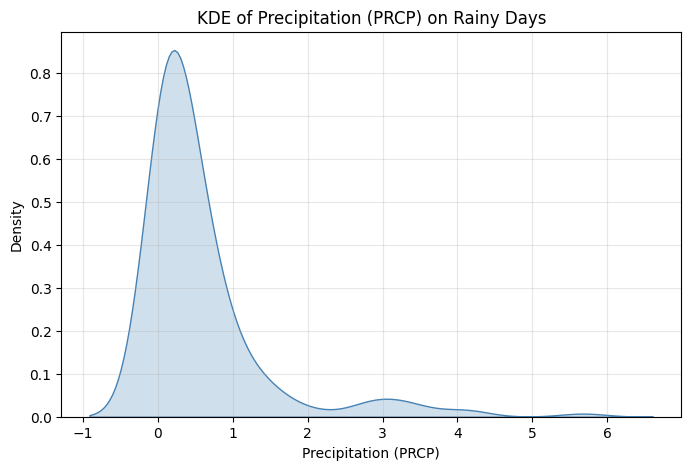

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter only rainy days
rainy = cw[cw['rain'] == 1]

# Plot KDE of precipitation on rainy days
plt.figure(figsize=(8,5))
sns.kdeplot(data=rainy, x='PRCP', fill=True, color='steelblue')
plt.title("KDE of Precipitation (PRCP) on Rainy Days")
plt.xlabel("Precipitation (PRCP)")
plt.ylabel("Density")
plt.grid(True, alpha=0.3)
plt.show()

I think that one way to make the model better would be adding more levels ot the rain variable. Rightnow, the variable is just binary, with rain and no rain, but there are many varying degrees or percipitations and the degrees of rain, I would imagine, influence the prediciton of rain more accurately than just a binary level.

4. Taxicab trajectories: Using the pickled taxicab data, we want to complete the exercise from class.

- For the taxicab trajectory data, determine your state space and clean your sequences of cab rides.
- Compute the transition matrix for the taxicab data between neighborhoods in Manhattan. Plot it in a heat map. What are the most common routes?
- Explain why taxicabs are most likely order 1, and not 2 or more.
- Starting at Hell's Kitchen, create a sequence of forecasts of where the cab is likely to be in 2, 3, 5, and 10 trips
- Starting at any neighborhood, iterate your forecast until it is no longer changing very much. Where do cabs spend most of their time working in Manhattan?

In [46]:
import pandas as pd
import re
from collections import defaultdict

# Read the data
tt = pd.read_pickle('/Users/adamchow/Library/CloudStorage/Box-Box/UVA/MSDS/Fall 2025/DS 5030/Assignments/taxicab.pkl')

# Function to parse a row
def parse_row(row_text):
    # Updated pattern to include apostrophes
    pattern = r'(\d+)\s+([A-Za-z\s\']+?)(?=\s+\d+|$)'
    matches = re.findall(pattern, row_text)
    
    area_counts = defaultdict(int)
    for count, area in matches:
        area_counts[area.strip()] += int(count)
    
    return dict(area_counts)

# Parse all rows
parsed_data = [parse_row(str(row)) for row in tt]

# Convert to DataFrame
df = pd.DataFrame(parsed_data).fillna(0)
df

,Outside Manhattan,SoHo,Greenwich Village,Chelsea,Midtown,Kips Bay,East Village,Upper East Side,Lower East Side,East Harlem,...,Theater District,Washington Heights,Civic Center,Chinatown,Little Italy,NoHo,Inwood,Marble Hill,Two Bridges,Roosevelt Island
0,0.0,58.0,13.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,22.0,34.0,7.0,136.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,3.0,0.0,0.0,0.0,136.0,40.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,13.0,6.0,22.0,0.0,7.0,0.0,20.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,29.0,0.0,3.0,0.0,0.0,21.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,44.0,0.0,0.0,0.0,0.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,0.0,0.0,0.0,0.0,0.0,17.0,7.0,102.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,0.0,0.0,0.0,3.0,22.0,0.0,0.0,34.0,0.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


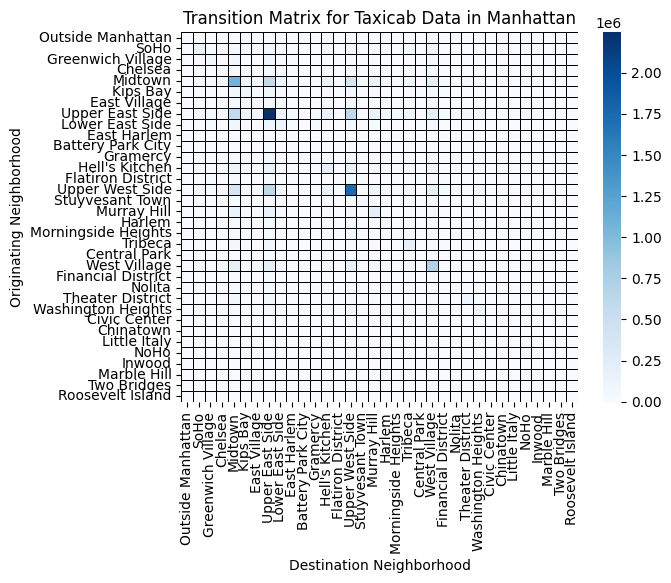

In [47]:
# Compute the transition matrix
transition_matrix = df.T.dot(df)

# Plot the transition matrix as a heat map
sns.heatmap(transition_matrix, annot=False, cmap='Blues', linewidths=0.5, xticklabels=1, yticklabels=1, linecolor='black')
plt.title('Transition Matrix for Taxicab Data in Manhattan')
plt.xlabel('Destination Neighborhood')
plt.ylabel('Originating Neighborhood')
plt.show()

From the graph, it looks to be that the most common routes are Upper East Side and Upper West Side and Upper East Side with Midtown.

When considering the nature of our data being the number of taxis recorded in different neighborhoods of Manhattan, it makes sense to order one taxi rather than 2+ because most people take individual trips. The majority of taxis are used to take individual rides where a single passanger hails a cab to be taken to a speicific destination. Another reason could be from the fact that some cabs may have a capacity limit, limiting the number of passangers that can be in the cab at one time.

In [49]:
# Starting location
current = "Hell's Kitchen"

# Track the path
path = [current]

# Simulate 10 trips
for i in range(10):
    # Find the most likely next location (excluding current location)
    possible_next = transition_matrix.loc[current].drop(current)
    next_location = possible_next.idxmax()
    path.append(next_location)
    current = next_location
    
    # Print at specific steps
    if i + 1 in [2, 3, 5, 10]:
        print(f"After {i+1} trips: {next_location}")

print(f"\nFull path: {' → '.join(path)}")

After 2 trips: Upper East Side
After 3 trips: Upper West Side
After 5 trips: Upper West Side
After 10 trips: Upper East Side

Full path: Hell's Kitchen → Upper West Side → Upper East Side → Upper West Side → Upper East Side → Upper West Side → Upper East Side → Upper West Side → Upper East Side → Upper West Side → Upper East Side


When I toggle my `current` variable to change for different starting points, you can eventually see that most of the starting points all point back to Upper East and Upper West Side. These two places are the two most popular stops in general. If you take  enough stops, most of the starting locations will eventually end up oscellating between these two places, if you assume that the person is not going to stay at the most recent spot they got off at.